In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Movie Data



We found the Data set we are using in the website Kaggle.com. The Data set contains 10k top-rated TMDB movies as of 26-July-2022. Within the data set there are 9 columns, 5 of which we consistently analyzed using graphs and charts. We compared the values of original language, popularity, release date, vote average and vote count of the movies in our data set.



In [2]:
df = pd.read_csv('moviesdata.csv')

In [3]:
#make copy to remove outliers
newFrame = df.copy(deep=True)

In [4]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [5]:
df.shape

(10000, 9)

In [6]:
df.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

## Missing Values

In [7]:
df.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [8]:
df["genre"].fillna("no genre", inplace = True)
df["overview"].fillna("no overview", inplace = True)
df.isnull().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [9]:
df.dtypes

id                     int64
title                 object
genre                 object
original_language     object
overview              object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

In [10]:
df["release_date"]=pd.to_datetime(df["release_date"], infer_datetime_format=True)
df.dtypes

id                            int64
title                        object
genre                        object
original_language            object
overview                     object
popularity                  float64
release_date         datetime64[ns]
vote_average                float64
vote_count                    int64
dtype: object

## Univariate Analysis



### Original Language



##### Original Language Bar Chart

This graph shows that out of the 10000 movies in the dataset, almost 7800 were originally in English. There are also about 900 that were originally in French. There were about 500 in Italian, 300 in Japanese, and 150 in Spanish. All other language were less than Spanish. This shows that the majority of top movies are originally written in English, followed by French, Italian, Japanese, and Spanish.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


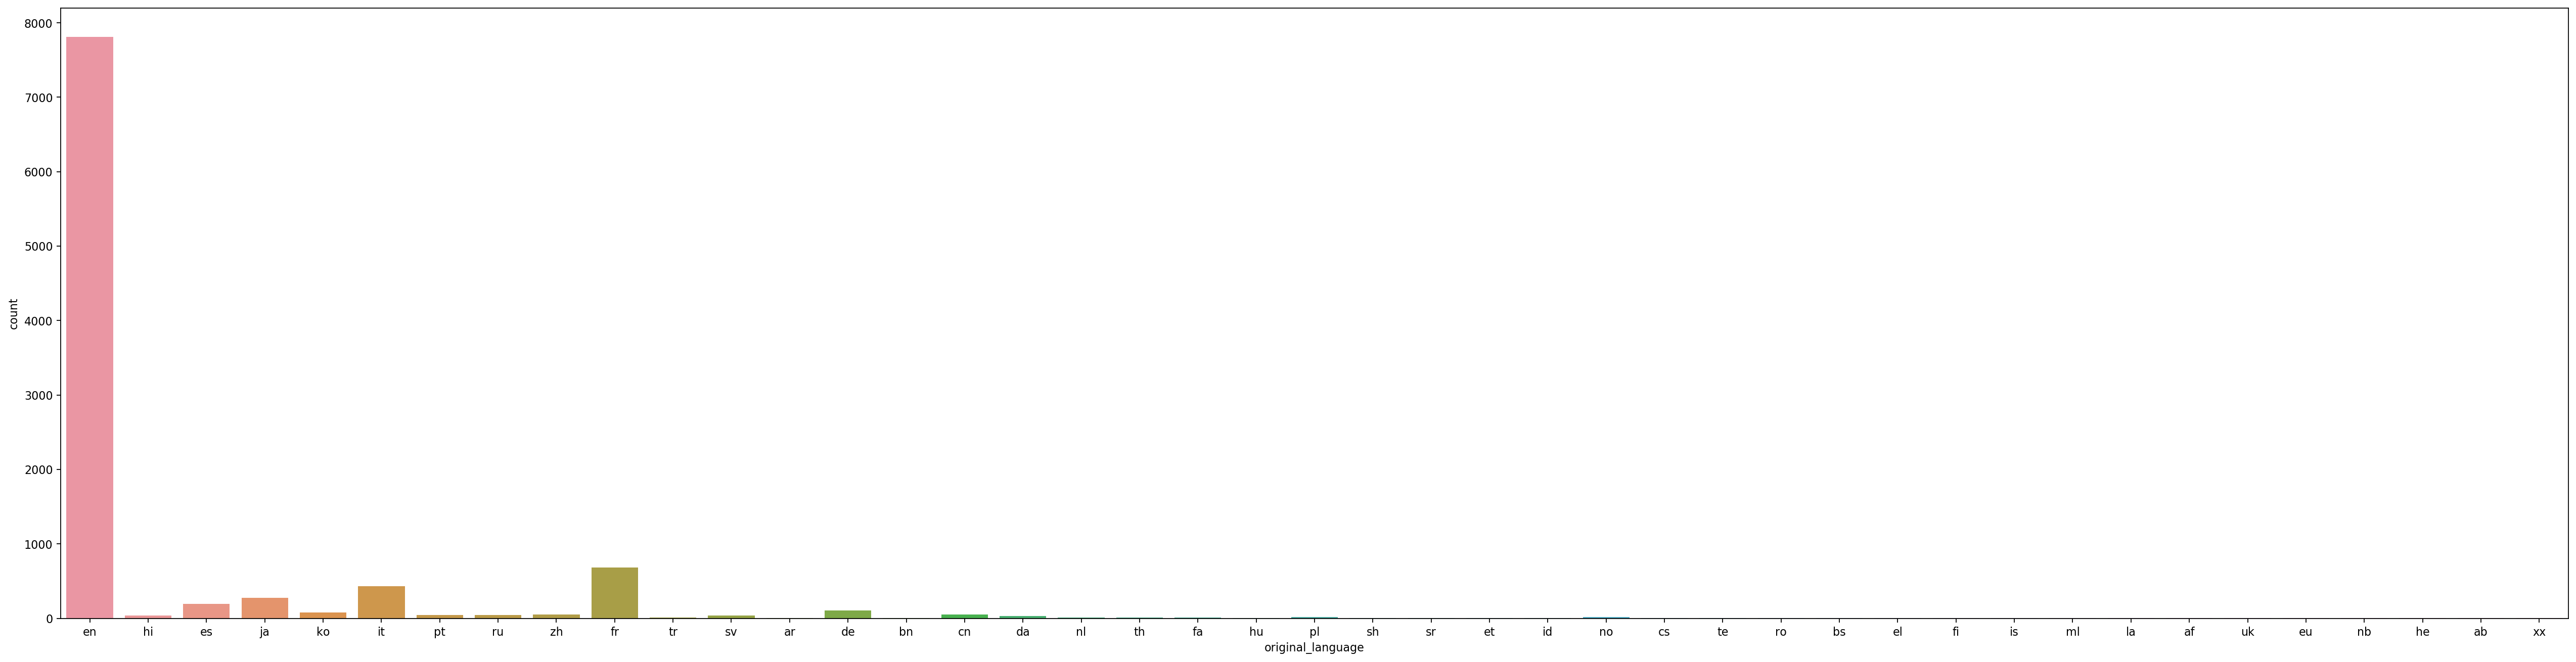

In [11]:
from matplotlib.pyplot import figure

figure(figsize=(40, 10), dpi=80)
sns.countplot(df['original_language'])

#### Original Language Pie Chart

This graph show the percentage of top movies that were originally written in each language. This graph confirms our observations from the previous graph. English makes up 78% of the top movies, followed by French with 7%, Italian with 4%, Japanese with 3%, and Spanish with 2%. All other languages are 1% or less. This again shows that most top movies are originally made in the listed languages.


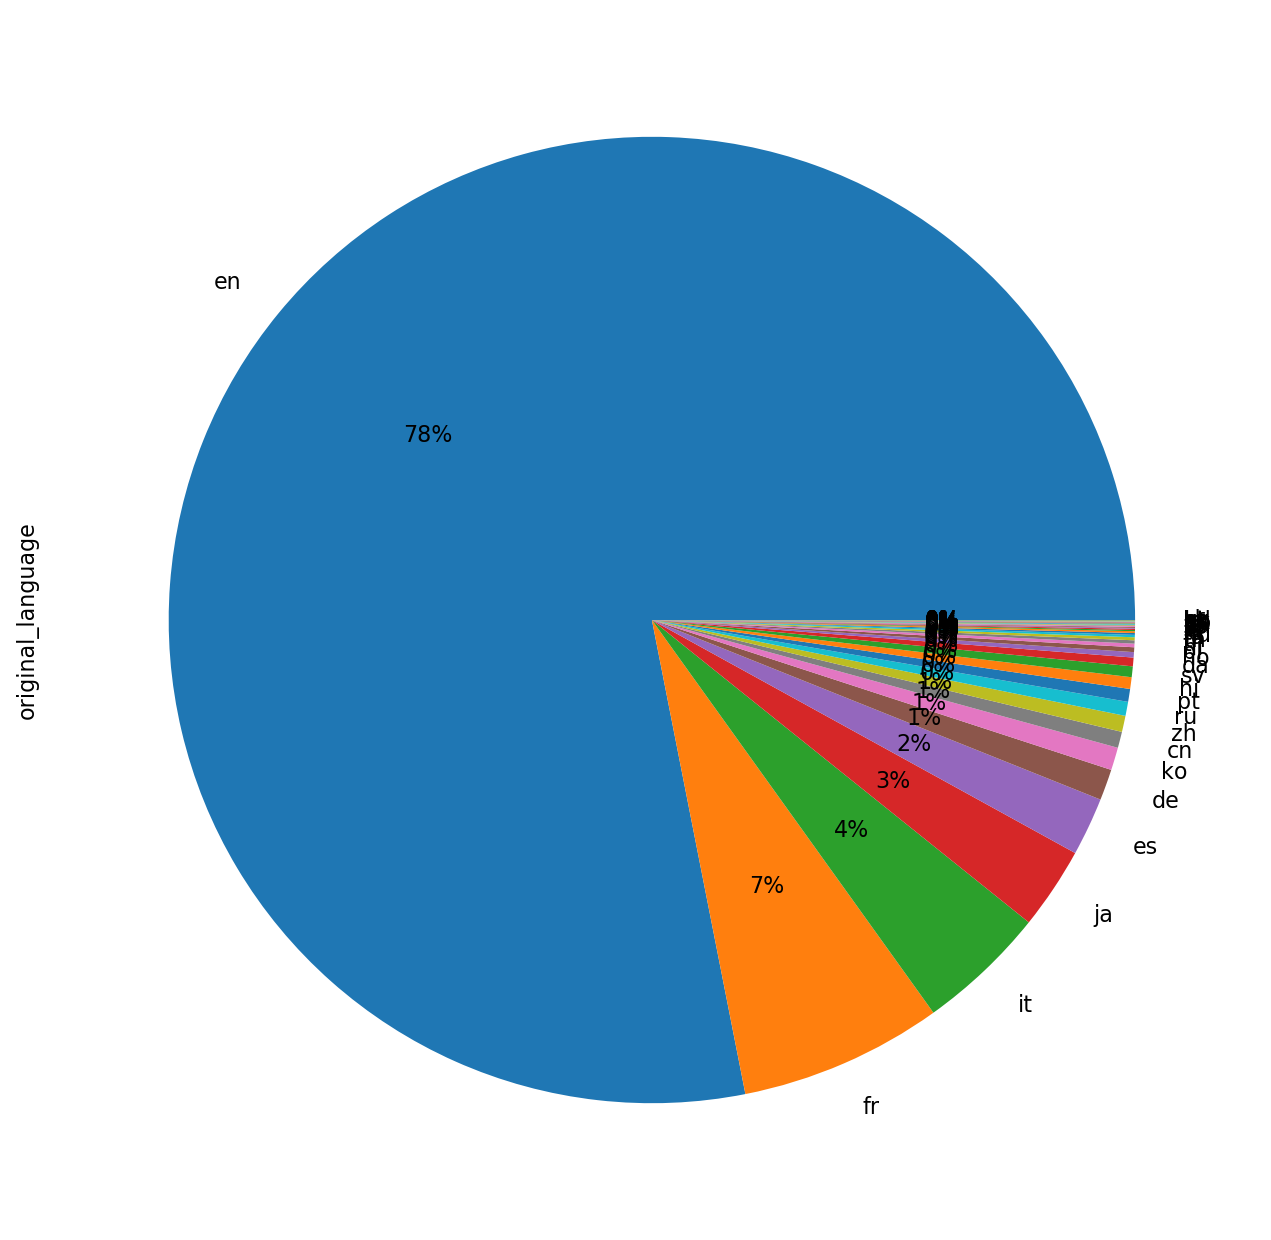

In [12]:
figure(figsize=(30, 10), dpi=80)

df["original_language"].value_counts().plot(kind='pie', autopct = '%1.0f%%')


## Release date



In [13]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month

#### Bar Chart of Years and Count of Top Movies

This chart shows an upward trend in the number of movies made because as time increases, so does the count of movies. This trend, however, stops around 2019, which is around the time COVID\-19 started spreading. This graph shows that although the number of top movies created was increasing, there was a time around COVID\-19 where there was actually a decrease in the number of top movies.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


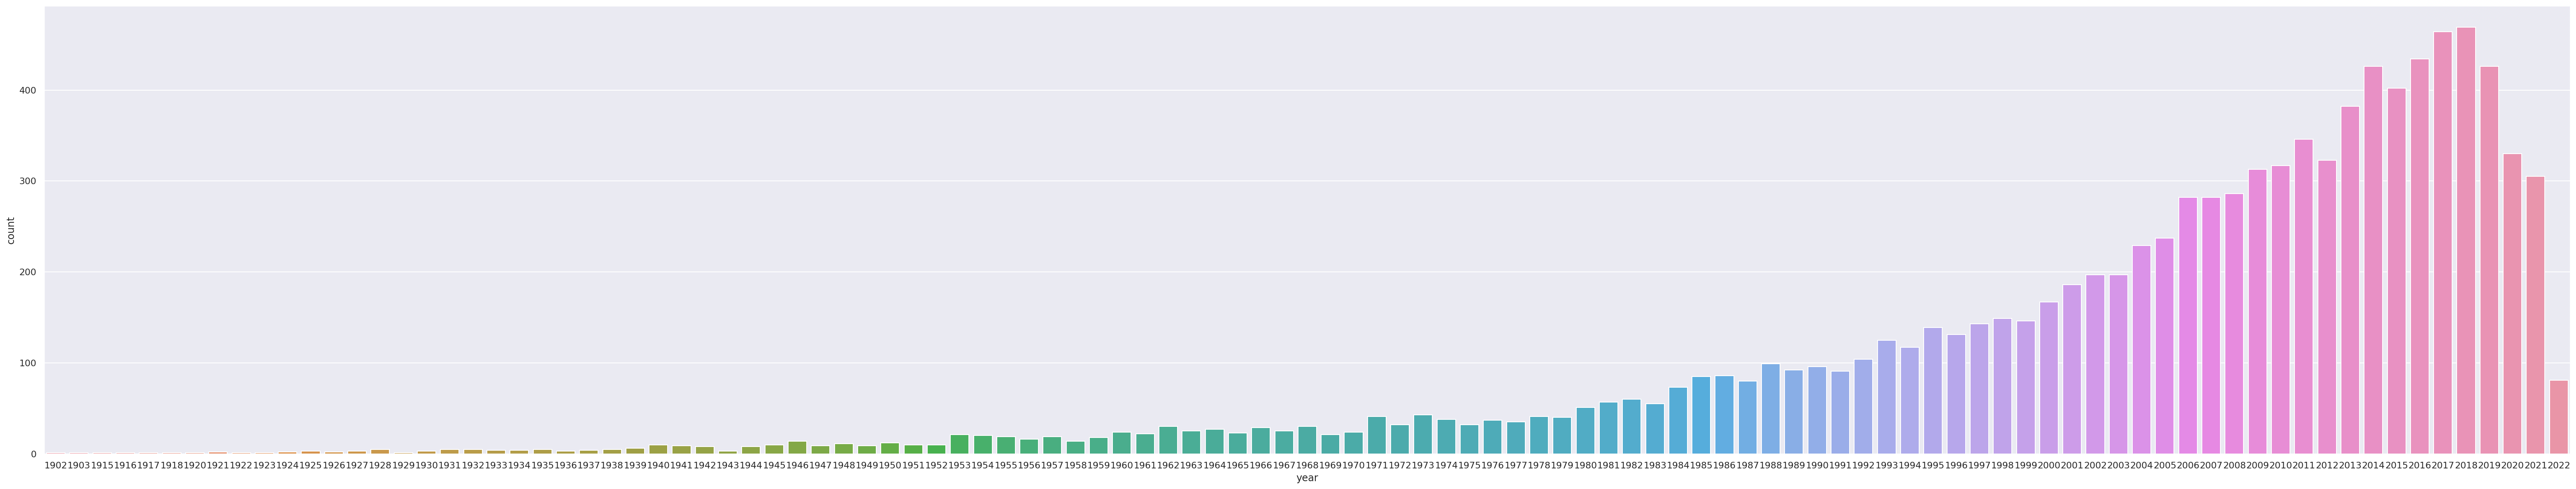

In [14]:
sns.set(rc = {'figure.figsize':(55,10)})
sns.countplot(df['year'])

#### Bar Chart of Months and Count of Top Movies

This graph shows the count of top movies in each month. There is clearly a spike around month 9, which is September, showing that more top movies are made in the fall. There is also a dip in January, as well as from April\-July. The drop in movie count from April\-July shows that less top movies are made during the summer.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


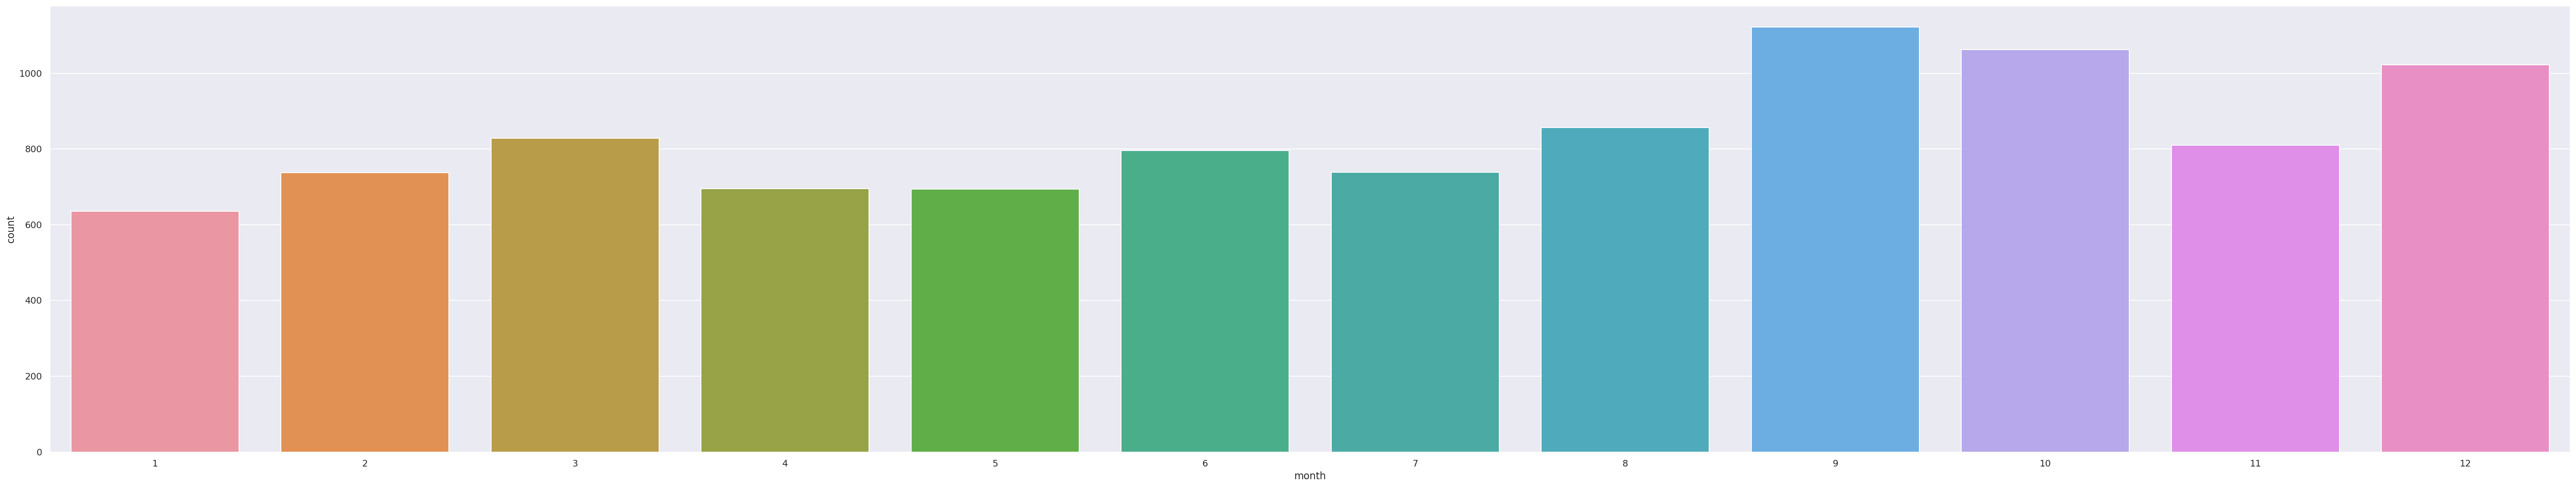

In [15]:
sns.countplot(df['month'])

#### Pie Chart of Years and Count of Top Movies

As shown in the graph, many of the years that make up larger than 1% of top movies are in the 21st century. This confirms the bar chart which also shows that the number of top movies has increased over the years.


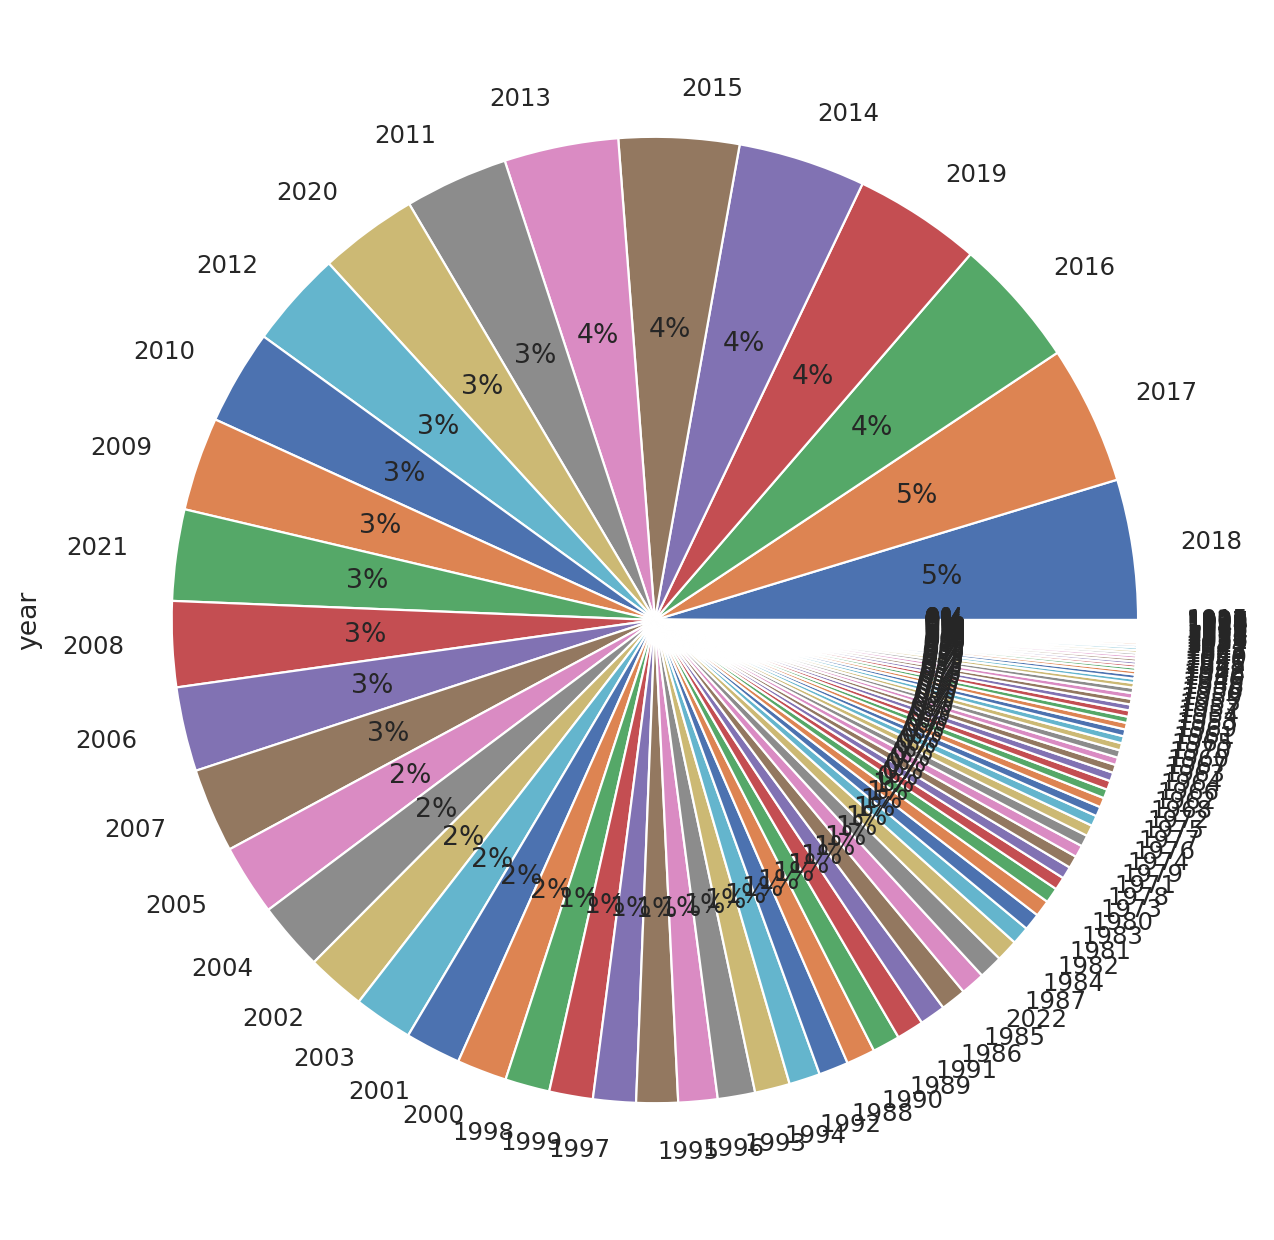

In [16]:
figure(figsize=(30, 10), dpi=80)
df['year'].value_counts().plot(kind ='pie', autopct = '%1.0f%%')

### Month Release Date Pie Chart



The pie chart below visually represents the percentage of movies released each month. The chart shows that September and October are the most common months with a percentage of 10\-11%. In comparison, January is the least common month with a percentage of 6% along with February, March, April, and July which all have 7%. 


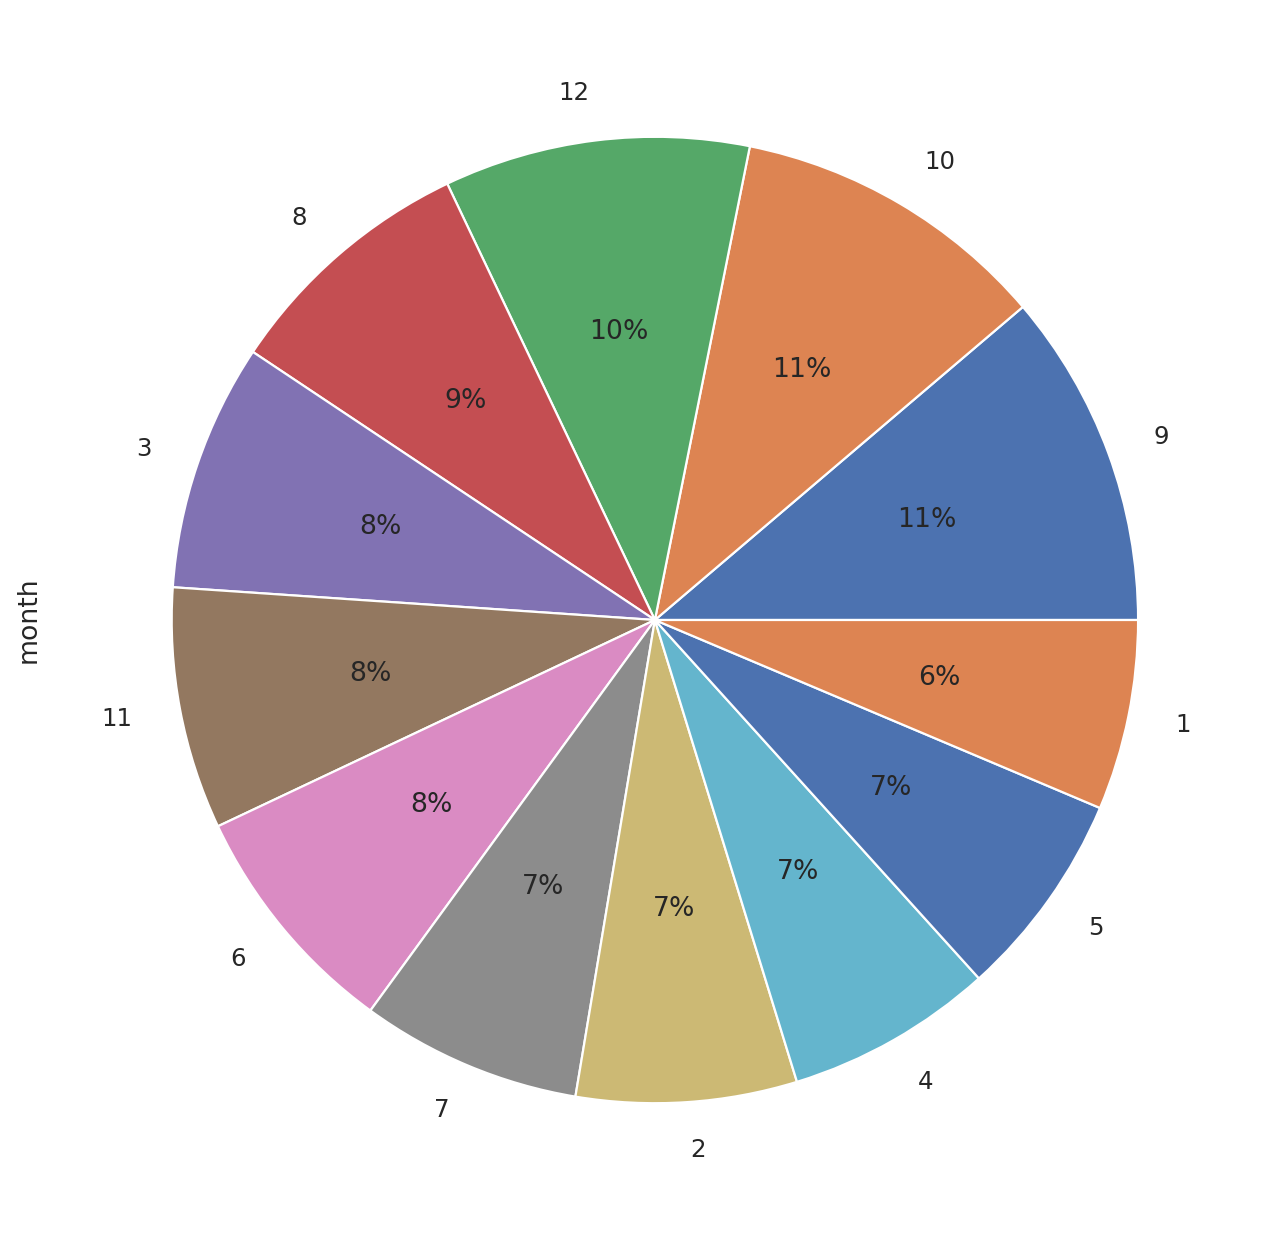

In [17]:
figure(figsize=(30, 10), dpi=80)
df['month'].value_counts().plot(kind ='pie', autopct = '%1.0f%%')

#### Mode Year

This data shows the year that had the most top count movies. This year is 2018 with a total of 469 top movies made during 2018. This shows 2018 was a great year for movies.


In [18]:
mode = df["year"].mode()
df['year'].value_counts()[mode]

2018    469
Name: year, dtype: int64

### Popularity

#### Popularity Mean

This shows that the average popularity is around 35.



In [19]:
df["popularity"].mean()

34.6972671

#### Popularity Percentiles

Through a look at percentiles, it is easy to find where the outliers are in our data. The 90th percentile is around 57 and the 95th percentile is around 94. When we look at the percentiles between these, we can see that the popularity score rises to up to around 10500 very quickly. After noticing this, we were able to break down the 99th percentile into 99.1, 99.2, etc., and we were able to identify that around the 99.7th percentile and beyond is where the outliers are.


In [20]:
np.percentile(df["popularity"], 90)

57.0795

In [21]:
for i in range(90, 101):
    print(np.percentile(df["popularity"], i))

57.0795
60.88484000000001
66.20536
73.09763999999996
82.86755999999995
94.11874999999976
109.14619999999996
130.32240999999985
172.10282000000097
260.68646
10436.917


In [22]:
i=99
while i<100:
    print(np.percentile(df["popularity"], i))
    i+=0.1

260.68646
287.03755900000004
323.42540799999585
337.51553299999836
371.40436799998497
430.8741699999931
487.03575999993666
639.2523339998509
966.7424619996505
1713.8695029999499
10436.916999991186


In [23]:
np.percentile(df["popularity"], 95)

94.11874999999976

### Popularity Plot Density



The plot density graph below indicates that the popularity is concentrated in the zero value. There is only one peak in the graph that has no scew indication that there is little distribution below and above zero. 


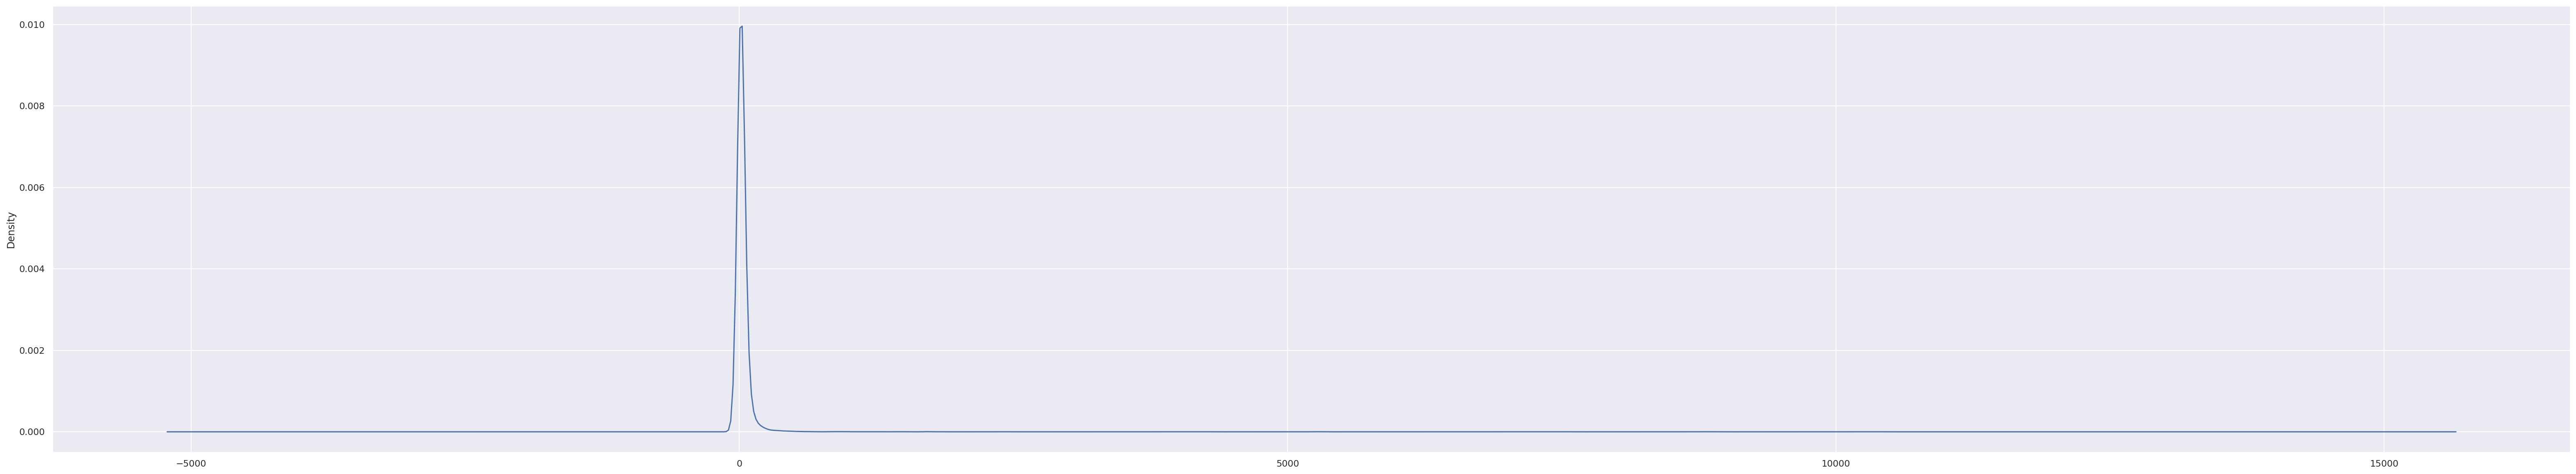

In [24]:
df["popularity"].plot.density()

#### Popularity CDF And PDF Graph

Because the CDF graph appears to be a value of 1 from the origin, we can see that the values must all be very close to the origin. This idea is also apparent because the PDF has a steep downward slope. This means the probability of any value to the right of the graph is very low. So, together, these show that our data is mostly on the left side of the graph and only a few outliers remain on the right side of the graph. Also, as the values get higher, their probability decreases.


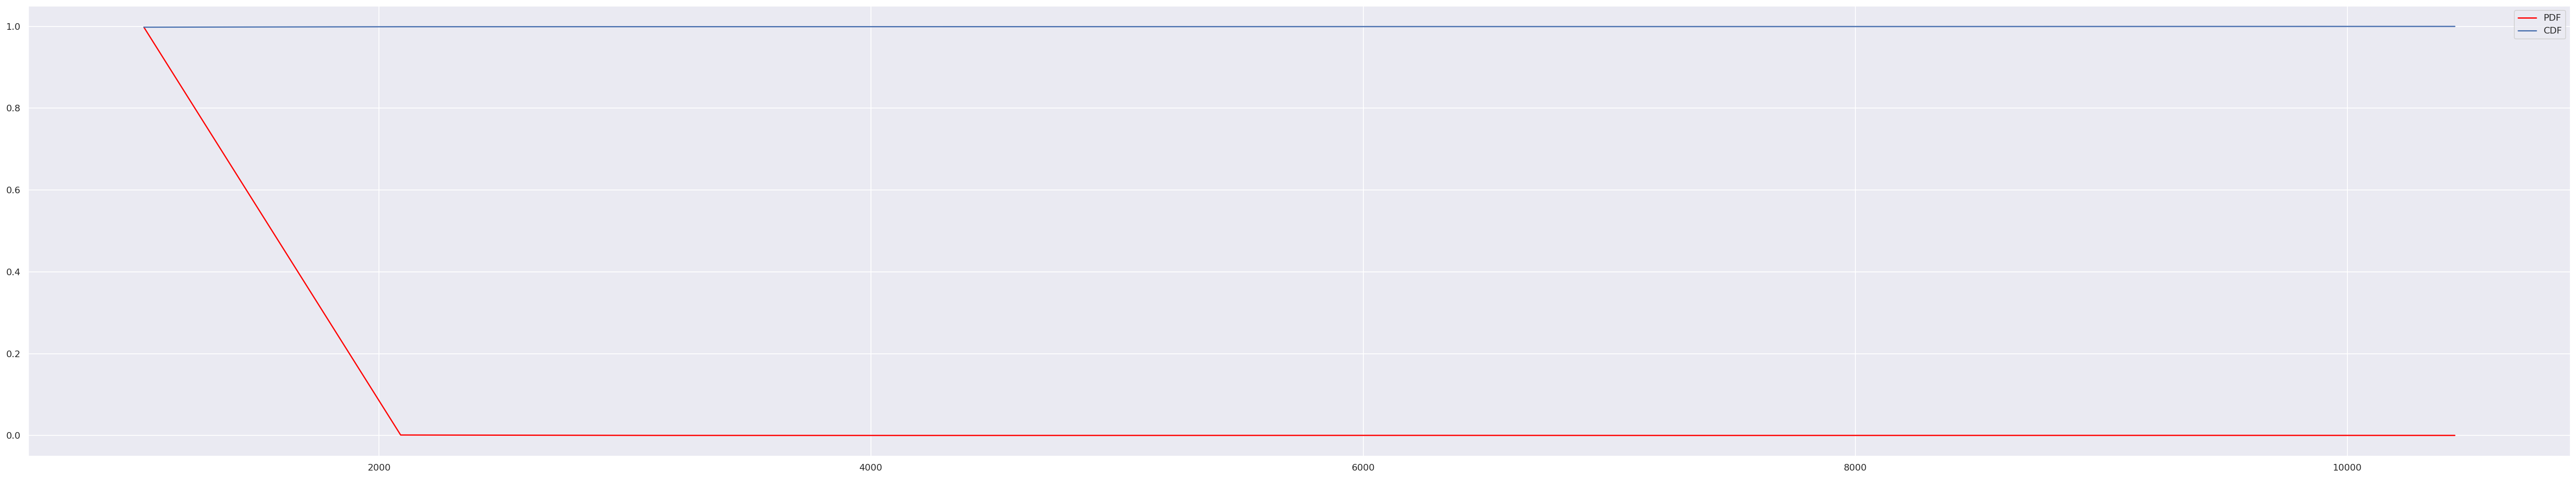

In [25]:
data = np.array(df['popularity'])
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

#Came from:https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

#### Popularity Box Chart

This box chart helps to show what we saw in the PDF and CDF graphs. Most of the values are concentrated near the lower values, and only a few outliers represented by dots remain outside of the range of the dataset.


<Figure size 7200x2400 with 0 Axes>

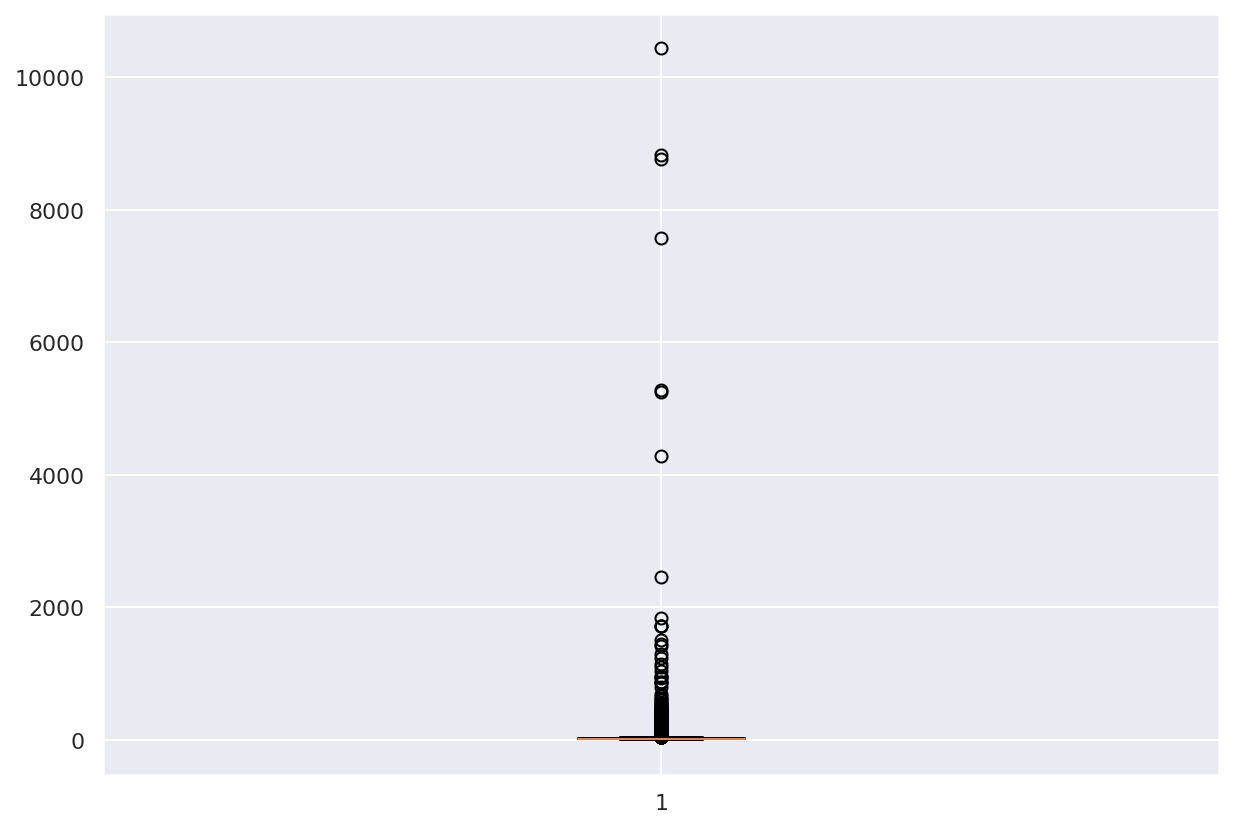

In [26]:
figure(figsize=(90, 30), dpi=80)
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["popularity"])
plt.show()

#### Popularity Mode

The mode of the popularity is 0.6 which can be found 7 times in the dataset. Given that the mode is only present 7 times, it is apparent that the data must be very different. Only 7/10000 data points have the same value.


In [27]:
mode = df["popularity"].mode()
df['popularity'].value_counts()[mode]

0.6    7
Name: popularity, dtype: int64

#### Popularity Min/Max

The maximum popularity was 10436.917 and the minimum was 0.6. The mode was also 0.6, showing that the minimum was also the mode of the dataset. The difference between these numbers also shows that there was a huge range of values in the dataset.


In [30]:
max(df["popularity"])

10436.917

In [31]:
min(df["popularity"])

0.6

### Vote Average



#### Vote Average Mean

This shows that the average vote average is around 6.6.


In [32]:
df["vote_average"].mean()

6.62115

#### Vote Average Percentiles

The 90th percentile of vote average was 7.6, and the 95th percentile was 7.9. We looped through each percentile between 90\-100 and 99\-100 in order to find outliers. This dataset, however, showed gradual increases between each percentile and so we could see that there were no outliers.


In [33]:
np.percentile(df["vote_average"], 90)

7.6

In [34]:
np.percentile(df["vote_average"], 95)

7.9

In [35]:
for i in range(90, 101):
    print(np.percentile(df["vote_average"], i))

7.6
7.7
7.7
7.8
7.8
7.9
7.9
8.0
8.1
8.3
8.7


In [36]:
i=99
while i<100:
    print(np.percentile(df["vote_average"], i))
    i+=0.1

8.3
8.3
8.3
8.3
8.4
8.4
8.4
8.4
8.5
8.5
8.7


#### Vote Average Plot Density

This graph shows that the values are evenly distributed. because the graph is curved and the area under the curve is about equal on both sides of the peak.


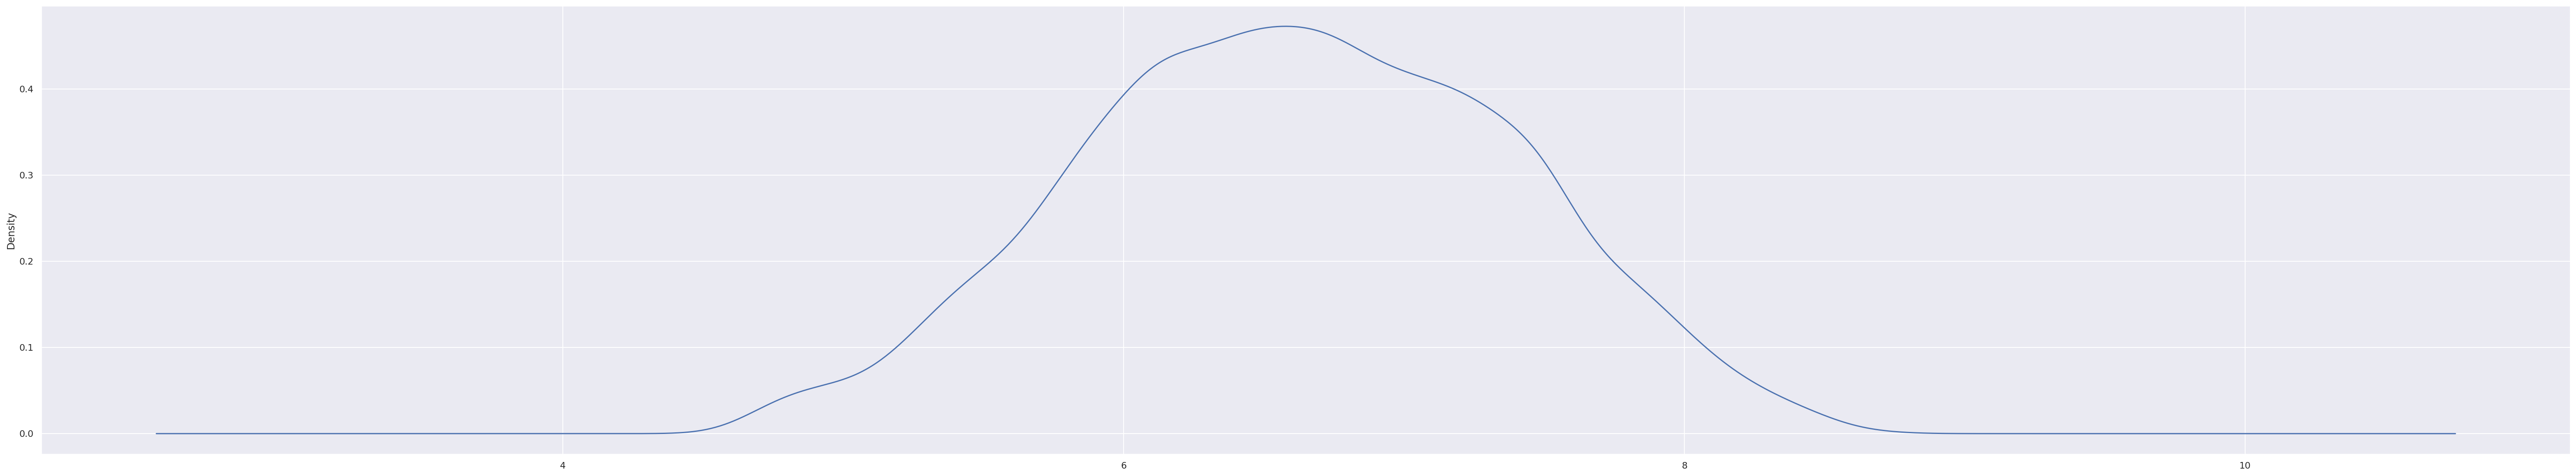

In [37]:
df["vote_average"].plot.density()

#### Vote Average CDF and PDF

The CDF graph shows that the data is very distributed among different values, rather than being concentrated near the origin similar to the popularity graph. The PDF graph shows a similar idea because the curve shows that most values have an above zero probability and there are no sharp declines to zero probability.


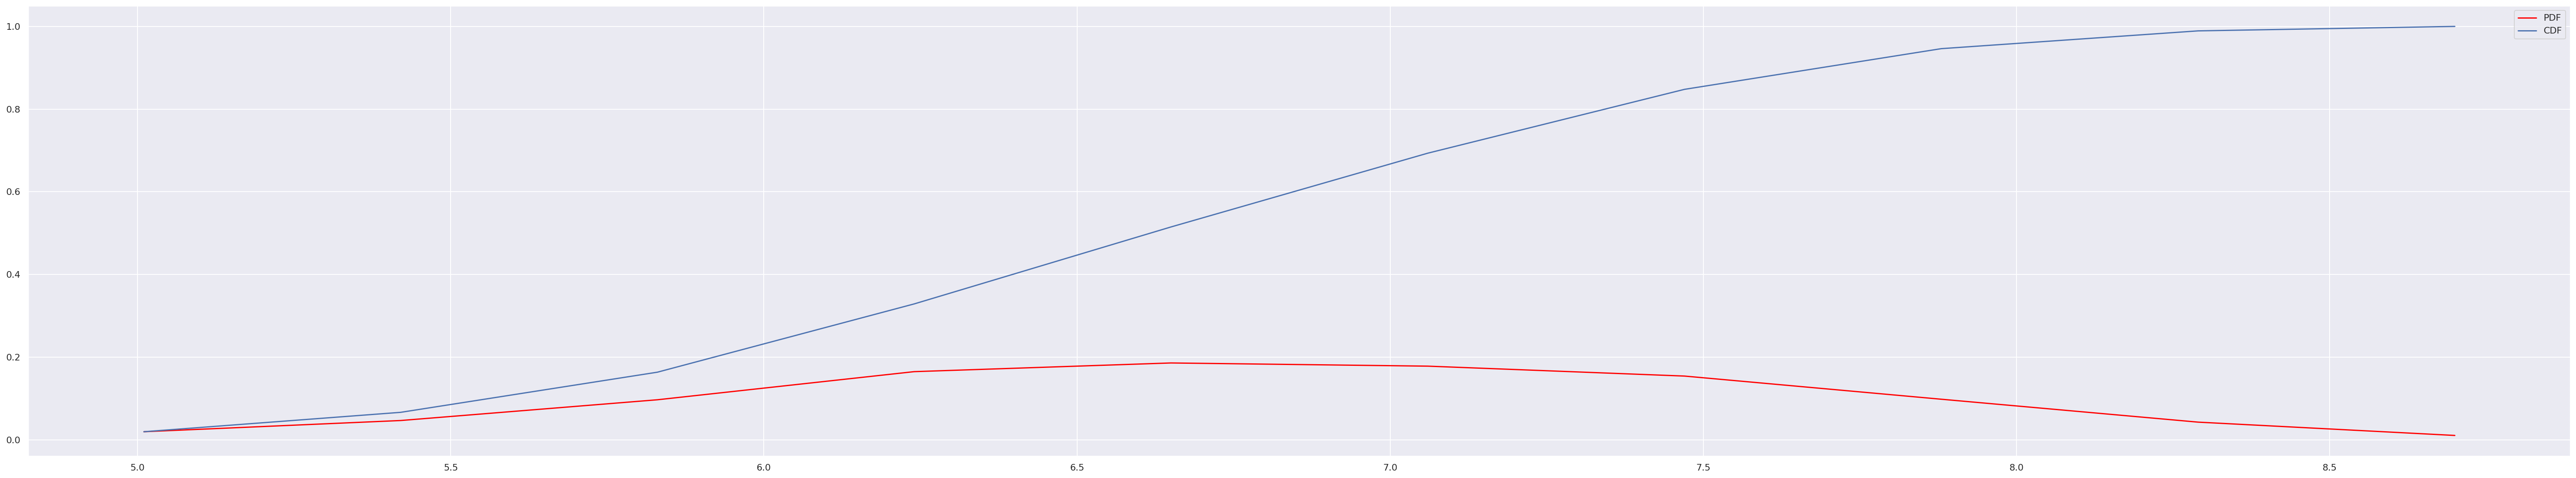

In [38]:
data = np.array(df['vote_average'])
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

#Came from:https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/


### Vote Average Box Plot



The Vote Average Box Plot shows the distribution of the average votes within the dataset. Using the box plot we are able to determine that the vote average has a median of 6.5 and the interquartile range is concentrated between 6 and 7.



<Figure size 7200x2400 with 0 Axes>

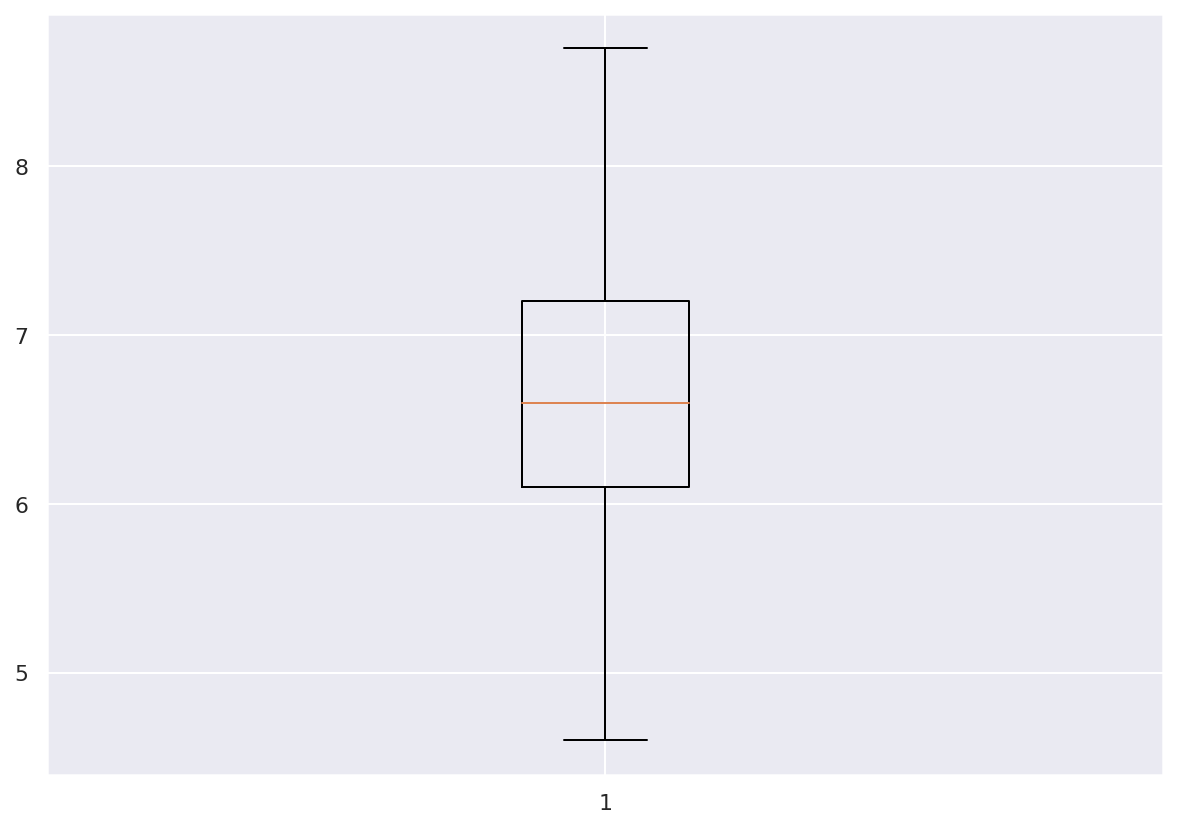

In [39]:
figure(figsize=(90, 30), dpi=80)
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["vote_average"])
plt.show()

### Vote Average Mode



The mode of the vote average is shown to be 6.6 which appears 478 times within the data set. This means that values are repeated a moderate amount of times because 478/10000 is a 
larger number than the other columns.



In [40]:
mode = df["vote_average"].mode()
df['vote_average'].value_counts()[mode]

6.6    478
Name: vote_average, dtype: int64

### Vote Average Max/Min



The vote average has a maximum of 8.7 and minimum of 4.6, indicating that 8.7 is the maximum score given to a movie while 4.6 was the lowest. 

In [41]:
max(df["vote_average"])

8.7

In [42]:
min(df["vote_average"])

4.6

### Vote Count



#### Vote Count Mean



The Vote Count Mean is 1547.3094.

In [43]:
df["vote_count"].mean()

1547.3094

#### Vote Count Percentile



The Vote Count's 90th percentile is 3784.4 while its 95th percentile is 6272.30. The percentiles do not have a sudden increase between percentiles indicating that there's fewer outliers.

In [44]:
np.percentile(df["vote_count"], 90)

3784.4000000000015

In [45]:
np.percentile(df["vote_count"], 95)

6272.299999999996

In [46]:
for i in range(90, 101):
    print(np.percentile(df["vote_count"], i))

3784.4000000000015
4120.880000000005
4633.16
5117.209999999999
5629.659999999994
6272.299999999996
7190.599999999986
8709.089999999997
10609.500000000011
14194.160000000003
31917.0


In [47]:
i=99
while i<100:
    print(np.percentile(df["vote_count"], i))
    i+=0.1

14194.160000000003
14639.251000000002
15104.175999999956
15924.328999999982
16567.22199999991
17392.434999999772
18181.347999999754
19314.149999999758
20172.499999996213
23032.448999997643
31916.999999983644


#### Vote Count Plot Density



The vote count plot density graph shows that the data is concentrated between 0 and 3000 as the curve is small and has a sharp peak.

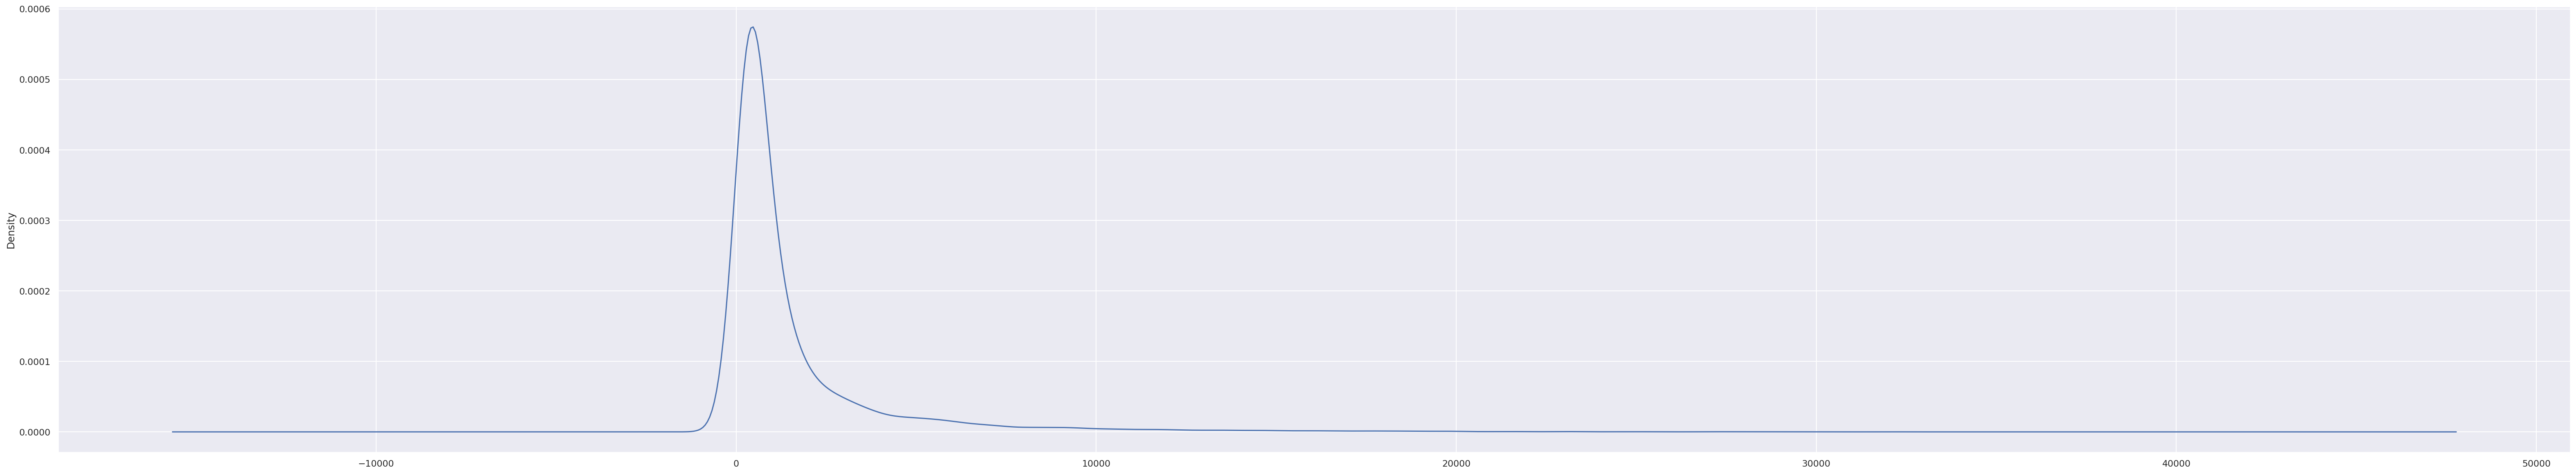

In [48]:
df["vote_count"].plot.density()

#### Vote Count CDF and PDF

The CDF graph shows that the vote counts are concentrated at values less that 10000 because after this the graph approaches 1.  The PDF graph shows that the vote counts are concentrated because there is a steep decline at about 7000 votes were the chance of more than 7000 votes is highly unlikely.


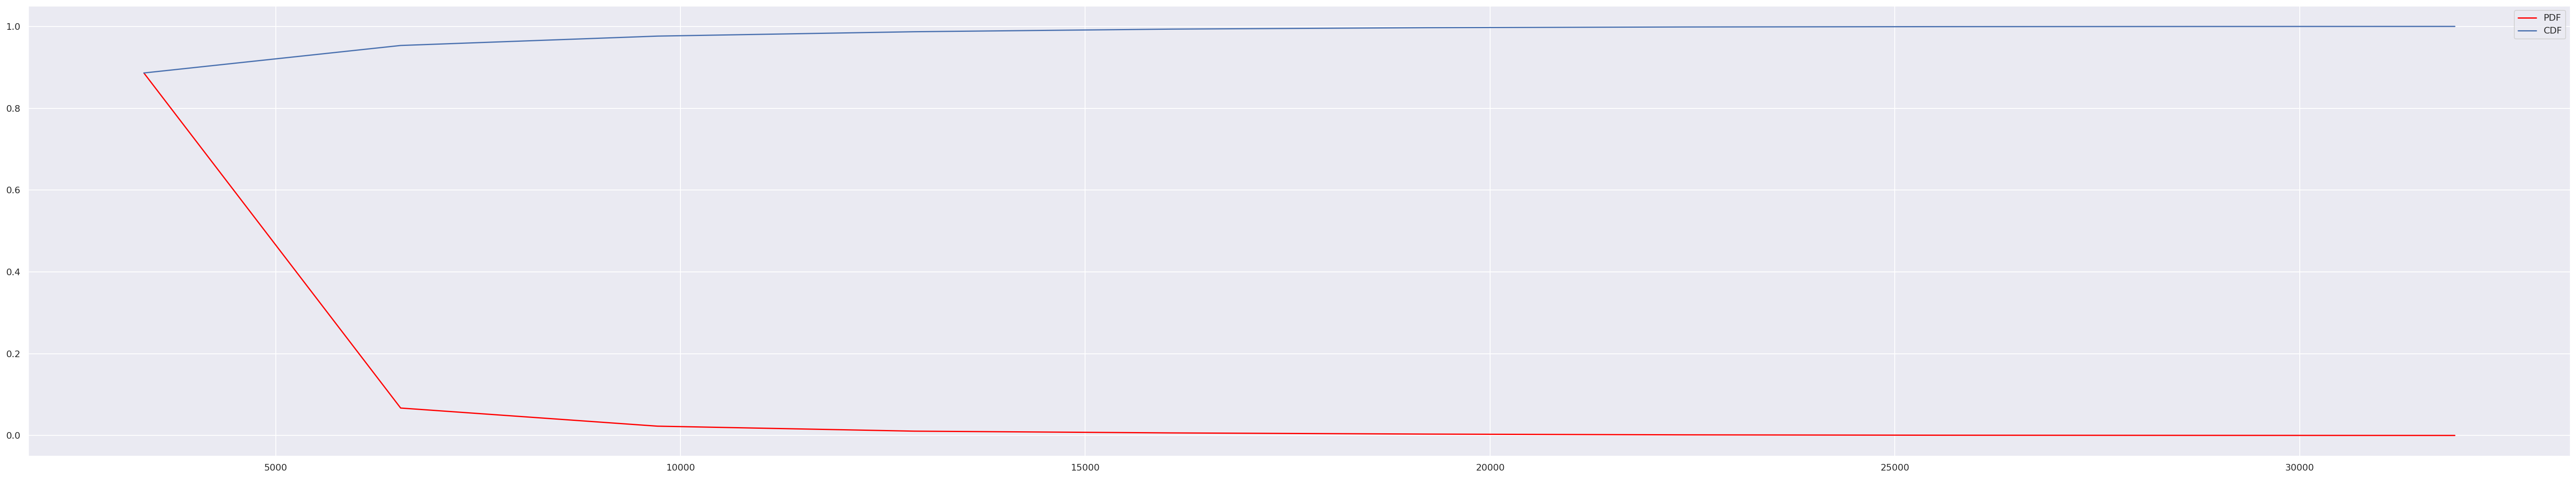

In [49]:
data = np.array(df['vote_count'])
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

#Came from:https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

#### Vote Count Box Chart

This chart shows the same observations as above. The many dots represent the many outliers. It is also apparent that the values are concentrated at values less than 5000 because the middle 50% of values are less than 5000.


<Figure size 7200x2400 with 0 Axes>

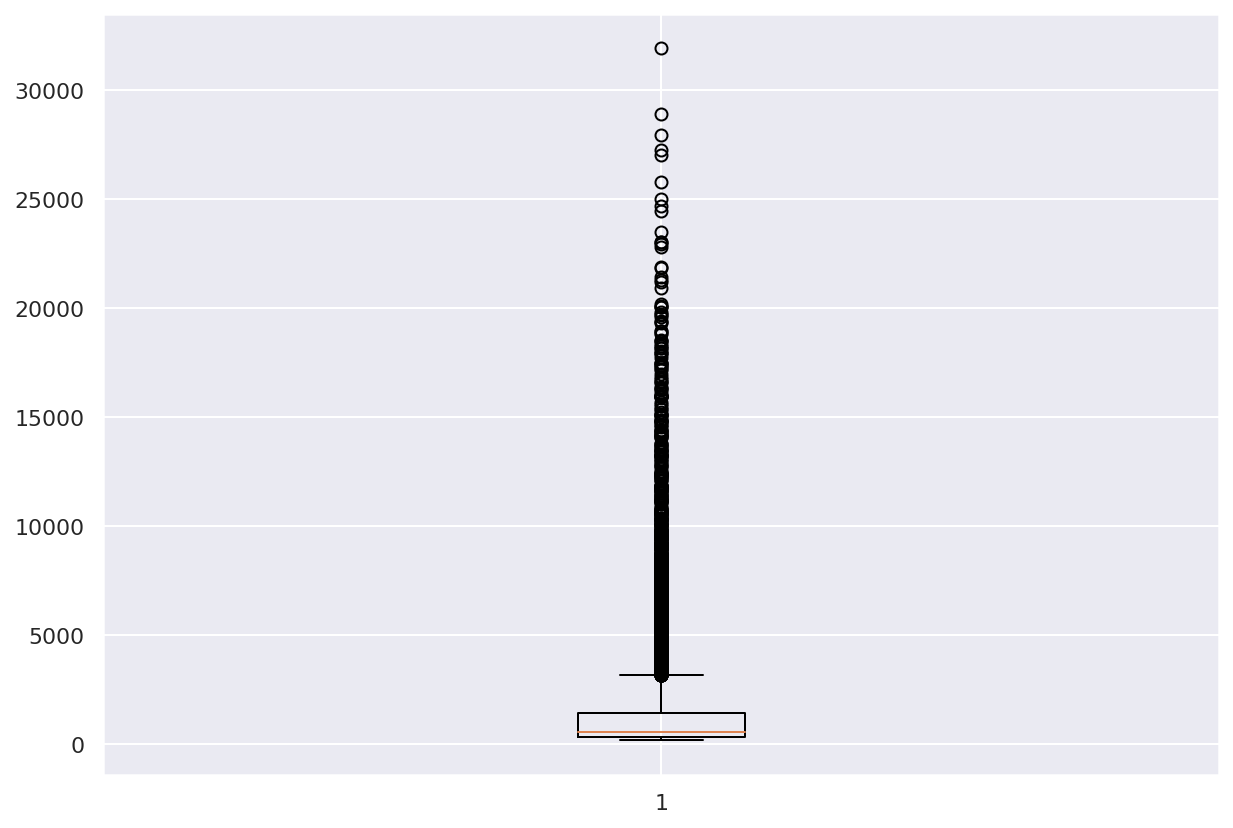

In [50]:
figure(figsize=(90, 30), dpi=80)
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["vote_count"])
plt.show()

#### Vote Count Mode

The mode is 210 which appears 41 times. 41/10000 is very small showing that the data is not repeated many times.


In [51]:
mode = df["vote_count"].mode()
df['vote_count'].value_counts()[mode]

210    41
Name: vote_count, dtype: int64

#### Vote Count Min/Max

The maximum vote count was 31917 and the minimum was 200. This shows a large range of vote counts, showing that the data was not close together.


In [52]:
max(df["vote_count"])

31917

In [53]:
min(df["vote_count"])

200

# Bivariate Analysis



In [54]:
df.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'year', 'month'],
      dtype='object')

### Corelation Plot

This plot shows the most related columns. Vote average and vote count are the most related with 0.27. Next vote count and popularity with 0.093, and then month and vote average and popularity and year with 0.08. The least related are year and vote average with \-0.26.


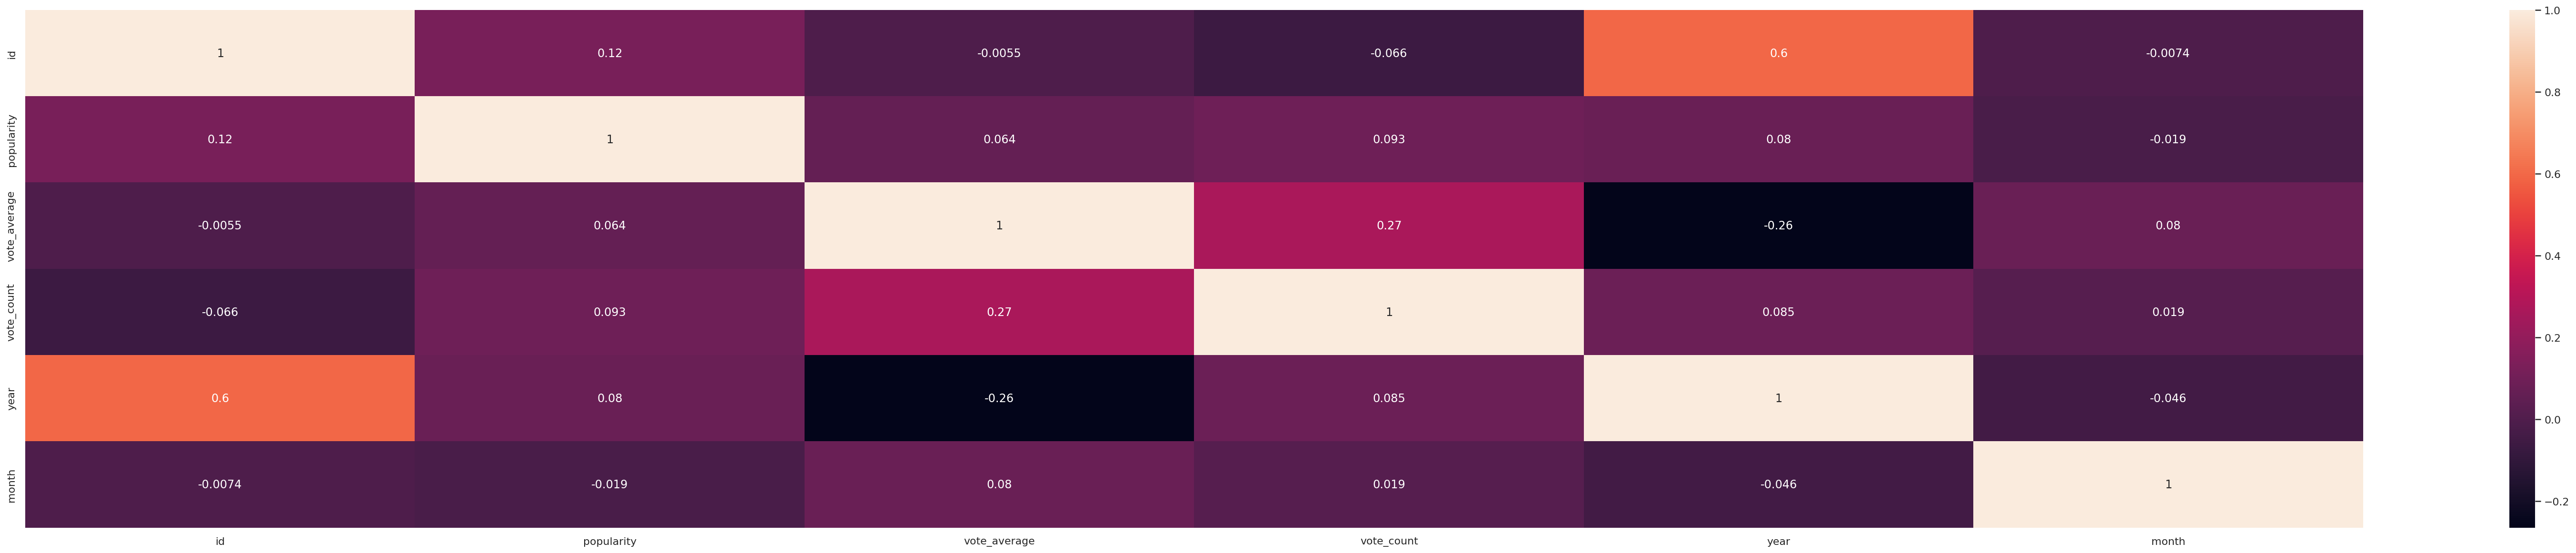

In [84]:
sns.heatmap(df.corr(), annot = True)

#### Language vs Popularity Graphs

These graphs show that the most popular movies are written in English, followed by Japanese, Spanish, and French in that order.



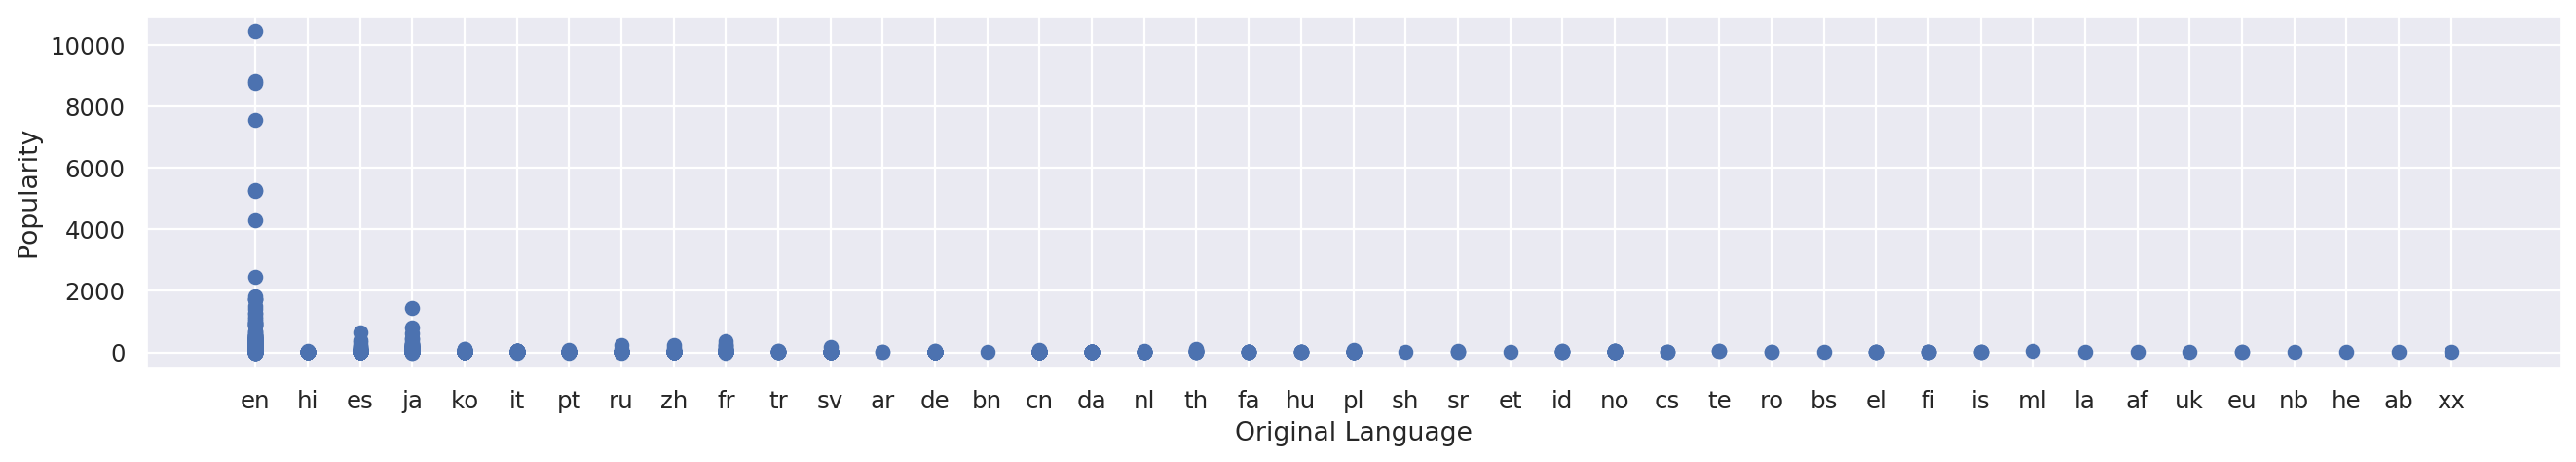

In [55]:
figure(figsize=(30, 10), dpi=80)
plt.scatter(df["original_language"], df["popularity"])
plt.gcf().set_size_inches((20, 3)) 
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.show()

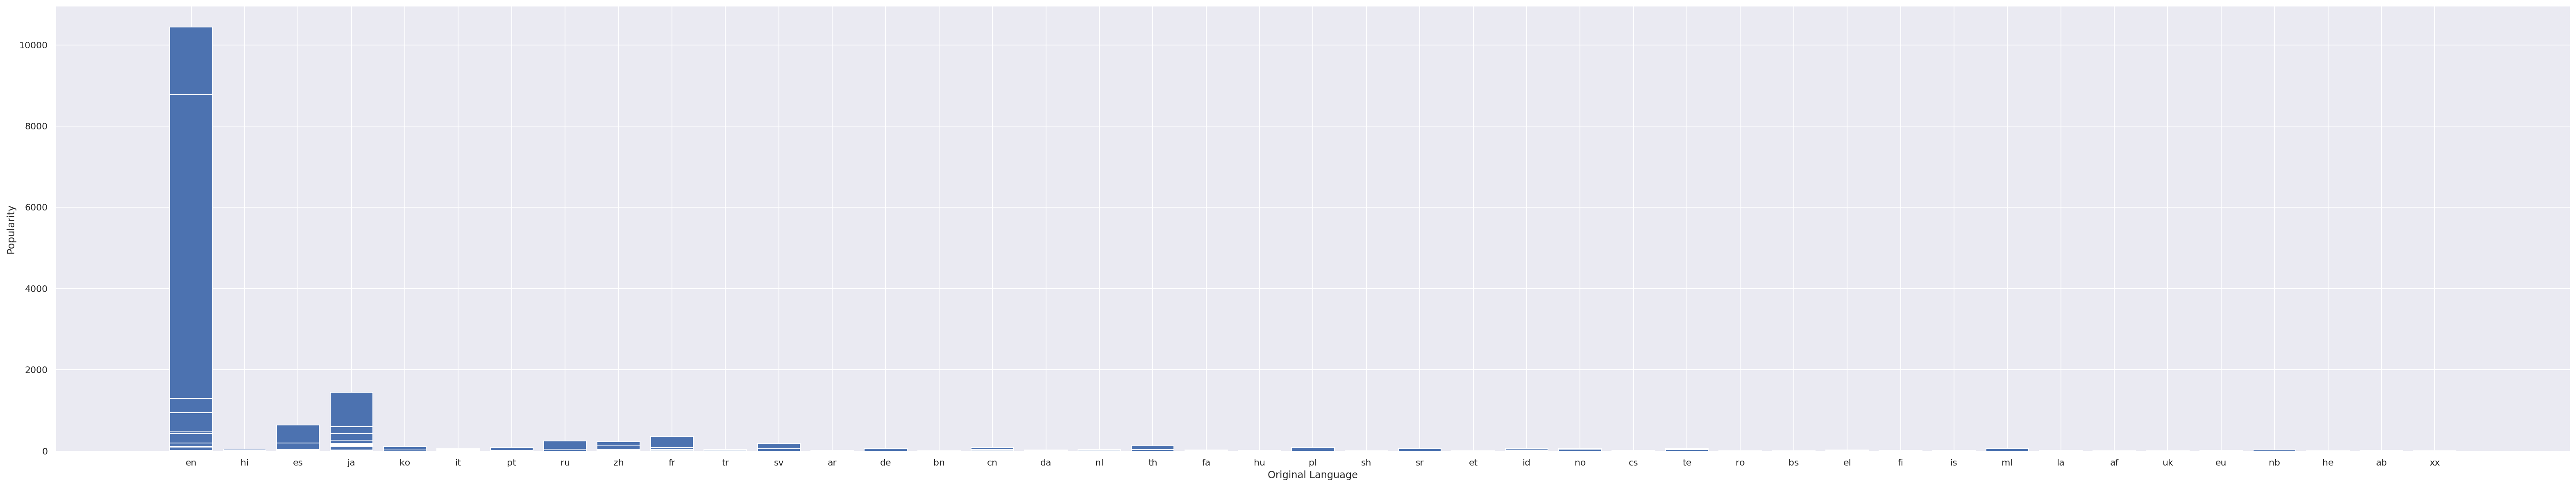

In [56]:
plt.bar(df["original_language"], df["popularity"])
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.show()

### Vote Average vs Popularity



#### Vote Average vs Popularity Scatter Plots

The first scatter plot shows the original dataset without alterations. It is visible that the data is very spread out due to outliers, and it is therfore hard to read the data. The second graph is without the outliers.



<Figure size 2400x800 with 0 Axes>

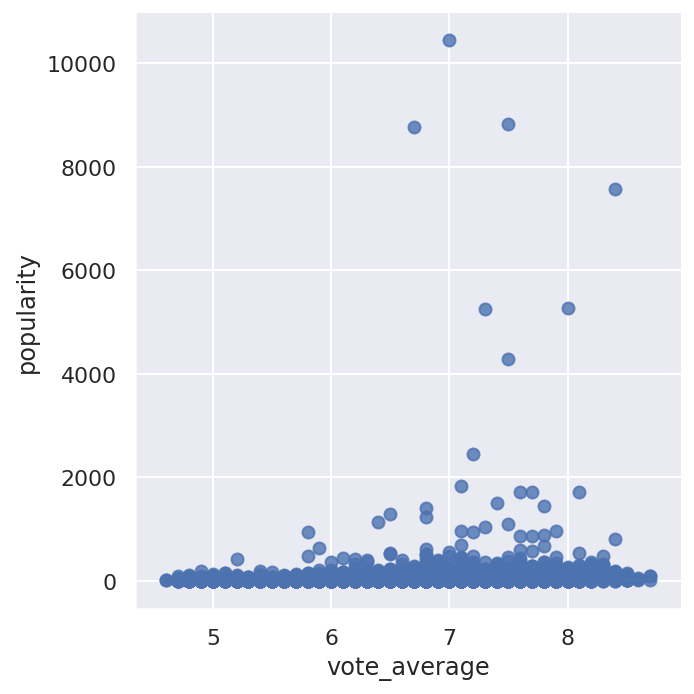

In [61]:
sns.lmplot(x='vote_average', y='popularity', data=df, fit_reg=True

#### Scatter Plot Without Outliers

Here is where we deleted outliers from a copy of the old dataframe\(at the beginning of the notebook named newFrame\) and graphed those. We used the Popularity box chart and percentiles to determine that popularities above 10000 were outliers. We then found those and deleted them from the new dataframe. The new graph, now makes it easier to see that as vote average increases, so does popularity.


In [58]:
print(np.where(newFrame['popularity']>1000))

(array([  61,  258,  388,  556,  837,  948, 1313, 1336, 1337, 1574, 1990,
       2196, 2815, 3066, 3103, 4025, 4281, 4522, 5792, 5823]),)


In [59]:
newFrame.drop(
    labels = [61,258,388,556,837,948,1313,1336,1337,1574,1990,2196,2815,3066,3103,4025,4281,4522,5792,5823],
    axis=0,
    inplace = True
)
print(np.where(newFrame['popularity']>1000))

(array([], dtype=int64),)


<Figure size 2880x7200 with 0 Axes>

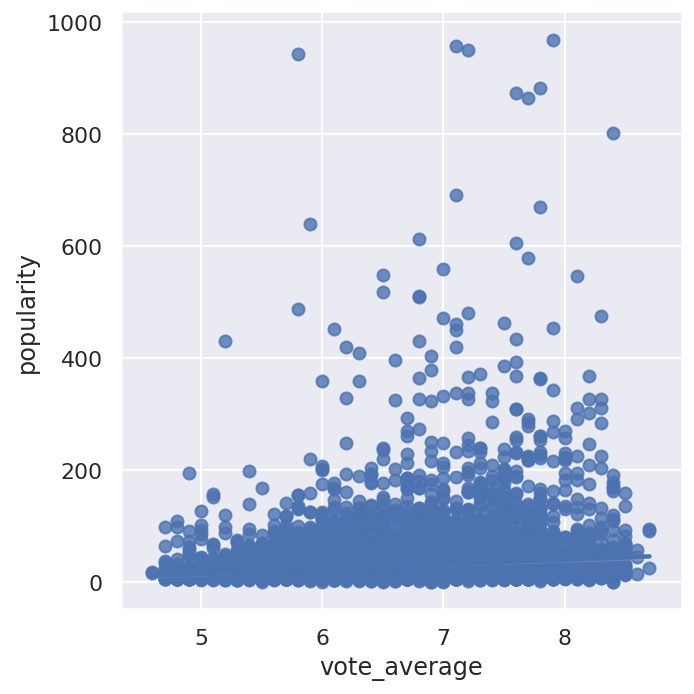

In [64]:
sns.lmplot(x='vote_average', y='popularity', data=newFrame, fit_reg=True)
#Better graph without outliers

#### Vote Average vs Popularity Joint Plot

This graph shows that the most concentrated vote average vs popularity would be a movie with a vote average of around 6.5 and popularity of around 50.


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

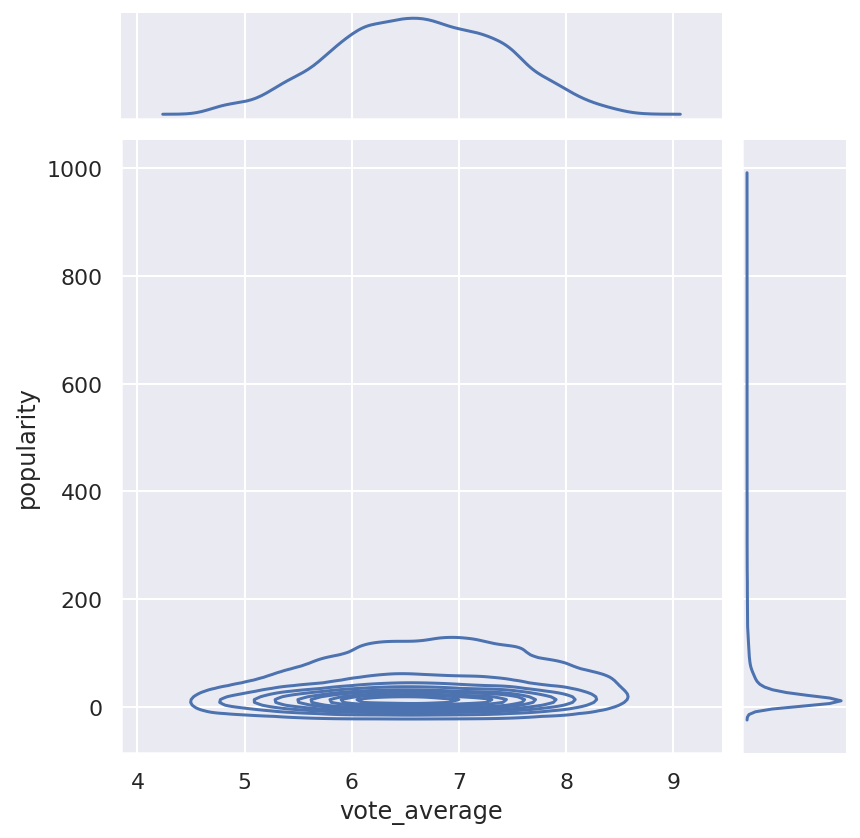

In [80]:
sns.jointplot(data=newFrame, x="vote_average", y="popularity", kind="kde")

### Vote Count vs Popularity



#### Vote Count vs Popularity Scatter Plots

The first graph is the raw data, and the second is without outliers. Both graphs clearly show that as vote count increases, so does popularity.


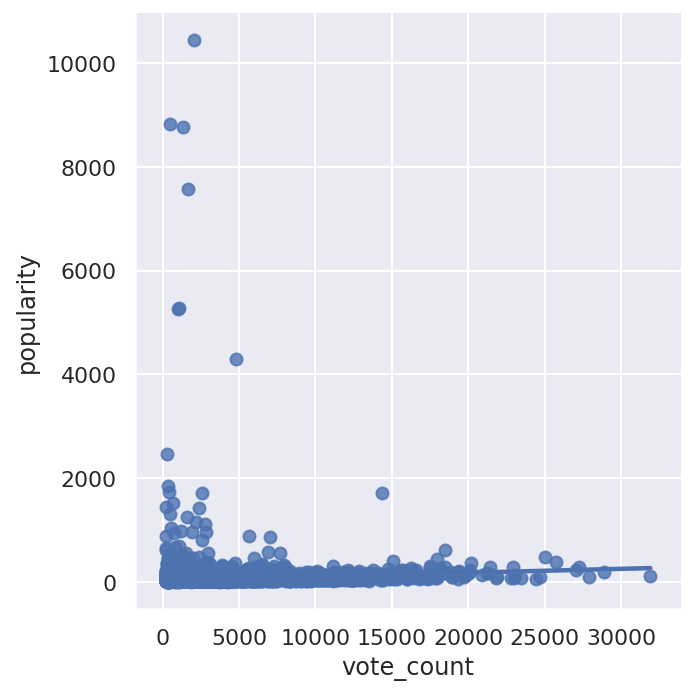

In [66]:
sns.lmplot(x='vote_count', y='popularity', data=df, fit_reg=True)

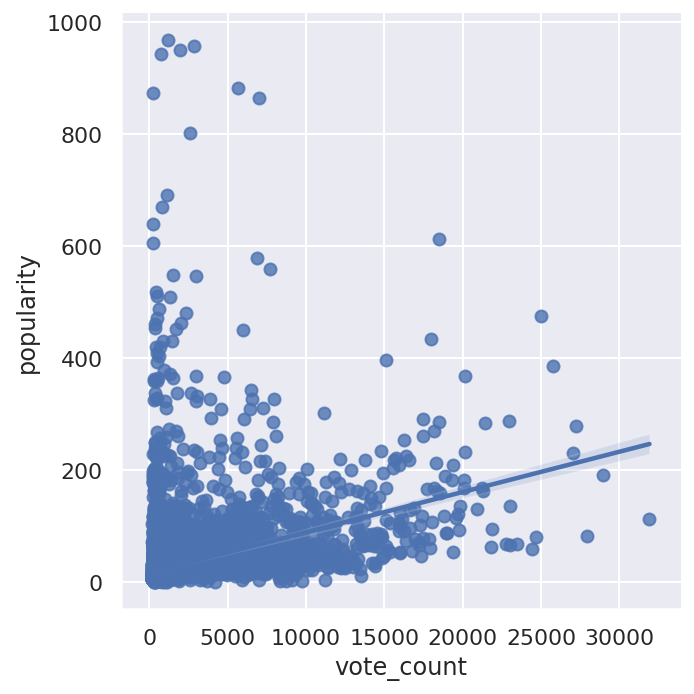

In [70]:
sns.lmplot(x='vote_count', y='popularity', data=newFrame, fit_reg=True)
#without outliers

#### Vote Count vs Popularity Joint Plots

The first graph is raw data and the second is without outliers. Both show that a typical movie would have a vote count of around 500 and a popularity of around 10.


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

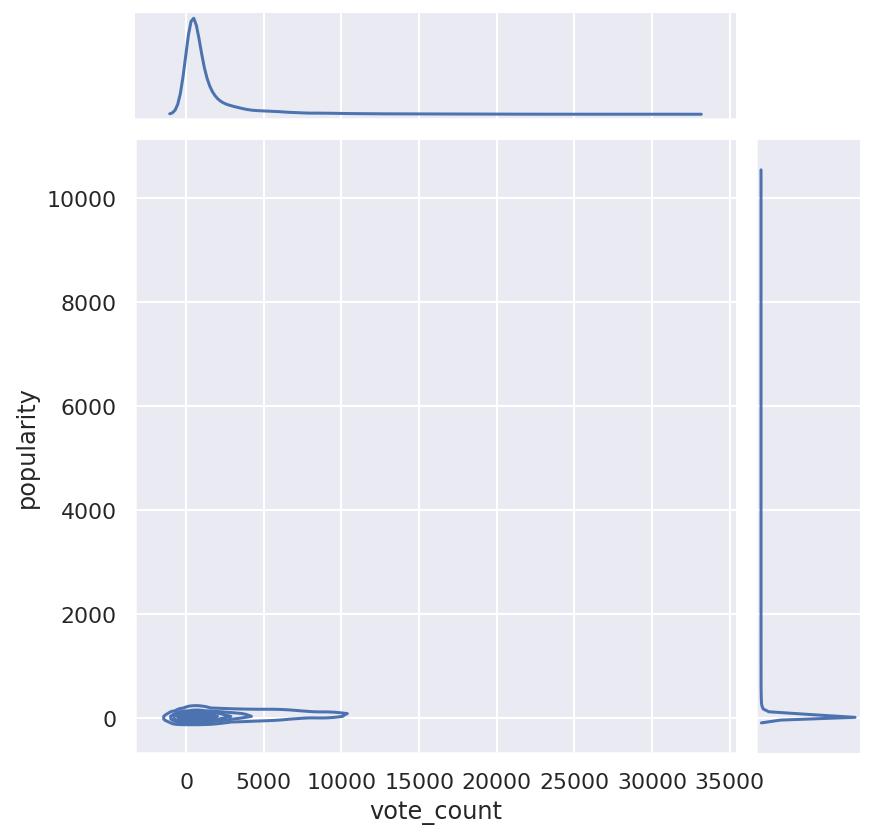

In [79]:
sns.jointplot(data=df, x="vote_count", y="popularity", kind="kde")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

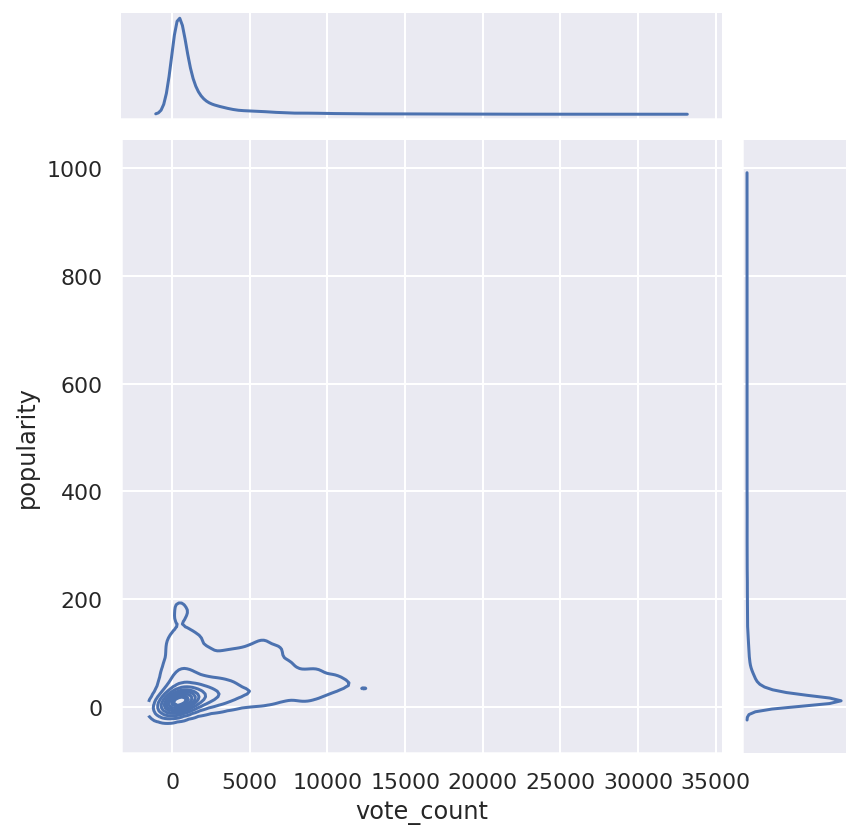

In [78]:
sns.jointplot(data=newFrame, x="vote_count", y="popularity", kind="kde")

### Vote Count vs Vote Average

#### Vote Count vs Vote Average Scatter Plot

This scatter plot shows a clear correlation between vote count and vote average. As the vote count increases, so does the vote average.



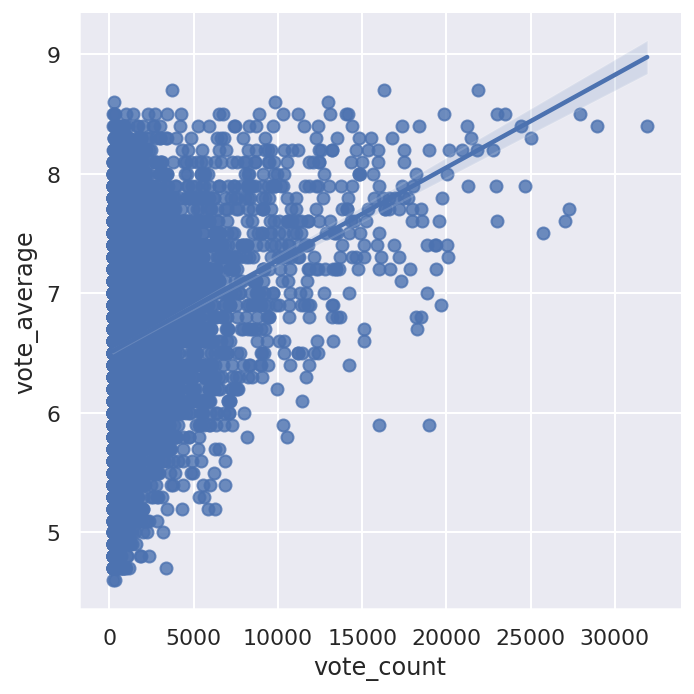

In [81]:
sns.lmplot(x='vote_count', y='vote_average', data=df, fit_reg=True)

#### Vote Count vs Vote Average Joint Plot



The Joint plot below contains a combination of the pdf of both the vote count and vote average. The combination shows that the concentration of the data is between 5 and 8 with a few outliers along the vote count.



/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

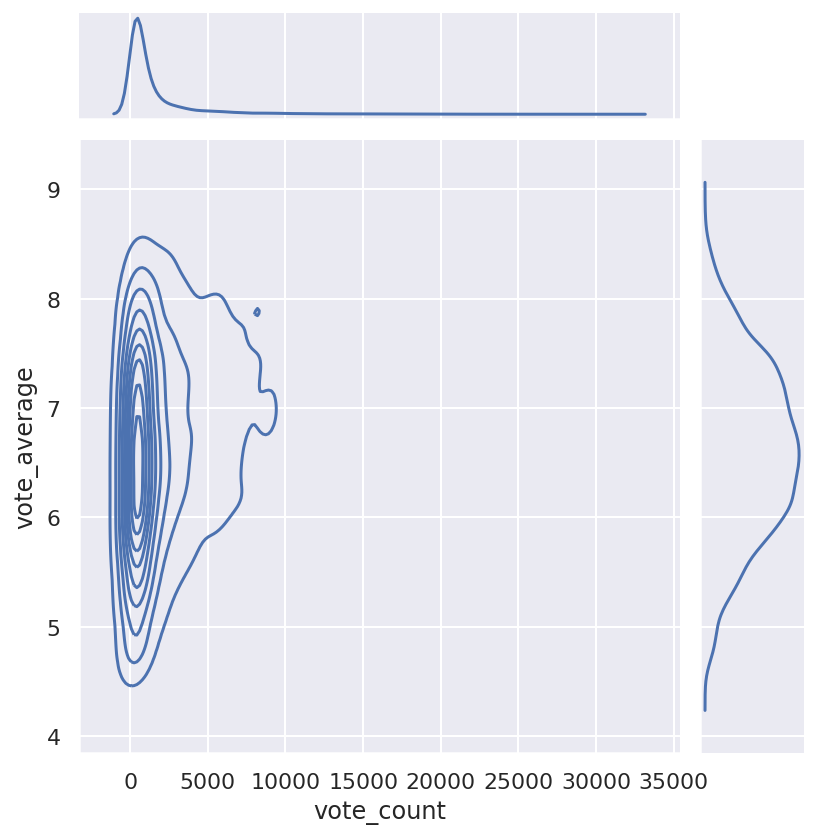

In [82]:
sns.jointplot(data=newFrame, x="vote_count", y="vote_average", kind="kde")